In [50]:
import requests
from bs4 import BeautifulSoup
import re
import csv
import pandas as pd
from apscheduler.schedulers.blocking import BlockingScheduler

In [2]:
#获取网页源代码
def gethtmltext(url):
    kv = {'user-agent':'Mozilla/5.0'}
    r = requests.get(url, headers = kv)
    r.encoding = r.apparent_encoding
    return r.text

In [3]:
#获取股票代码sh
def getstocklist_sh(html):
    lt = []
    soup = BeautifulSoup(html,'html.parser')
    ul = soup.find('ul', attrs = {'class':'ngblistul2'})
    all_li = ul.find_all('li')
    for li in all_li:
        href = li.a['href']
        code = re.findall(r'list,(\d+).html', href)[0]
        if code[:3] in ['600','601','603']:
            lt.append(code)
    ul_hide = soup.find('ul', attrs = {'class':'ngblistul2 hide'})
    all_li_hide = ul_hide.find_all('li')
    for li_hide in all_li_hide:
        href_hide = li_hide.a['href']
        code_hide = re.findall(r'list,(\d+).html', href_hide)[0]
        if code_hide[:3] in ['600','601','603']:
            lt.append(code_hide)
    print(lt)
    return lt

In [4]:
#获取股票代码sz
def getstocklist_sz(html):
    lt = []
    soup = BeautifulSoup(html,'html.parser')
    ul = soup.find('ul', attrs = {'class':'ngblistul2'})
    all_li = ul.find_all('li')
    for li in all_li:
        href = li.a['href']
        code = re.findall(r'list,(\d+).html', href)[0]
        if code[:3] in ['000']:
            lt.append(code)
    ul_hide = soup.find('ul', attrs = {'class':'ngblistul2 hide'})
    all_li_hide = ul_hide.find_all('li')
    for li_hide in all_li_hide:
        href_hide = li_hide.a['href']
        code_hide = re.findall(r'list,(\d+).html', href_hide)[0]
        if code_hide[:3] in ['000']:
            lt.append(code_hide)
    print(lt)
    return lt

In [5]:
#获取个股详细数据
def get_stock_price(code):
    """
    通过股票代码，模拟请求从东方财富网获取交易日数据
    :param code: 股票代码
    :return: 股票名称、300个交易日的日K数据
    """
    url = "http://22.push2his.eastmoney.com/api/qt/stock/kline/get"
    headers = {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Accept-Language': 'zh-CN,zh;q=0.9', 'Connection': 'keep-alive', 'Cookie': 'qgqp_b_id=ea1333abfc79cea5c265f9d77159fdf7; HAList=a-sh-600410-%u534E%u80DC%u5929%u6210; em_hq_fls=js; st_si=94908642787912; emshistory=%5B%22600410%22%5D; st_asi=delete; st_pvi=06885083096584; st_sp=2020-03-05%2010%3A46%3A18; st_inirUrl=https%3A%2F%2Fwww.baidu.com%2Flink; st_sn=4; st_psi=20200313135500750-113200301201-9886509617', 'Host': '22.push2his.eastmoney.com', 'Referer': 'http://quote.eastmoney.com/sh600410.html', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.70 Safari/537.36'}

    # 可以通过 lmt 设置返回交易日信息的数量，这里返回最近 300 个交易日
    params = {
        'cb': 'jQuery112408624872486898423_1584078899740',
        'secid': '{}.{}'.format("0" if code[0] in ("0","3") else "1", code),
        'ut': 'fa5fd1943c7b386f172d6893dbfba10b',
        'fields1': 'f1,f2,f3,f4,f5',
        'fields2': 'f51,f52,f53,f54,f55,f56,f57,f58',
        'klt': '101',
        'fqt': '0',
        'end': '20500101',
        'lmt': '300',
        '_': '1584078899802'
    }
    # 对返回的数据进行处理
    resp = requests.get(url=url, headers=headers, params=params)
    data = eval(resp.text[resp.text.index("{"):-2].replace("false","False").replace("null", "'null'"))["data"]
    stock_code = data['code']
    price_data = data['klines']
    return stock_code, price_data

In [6]:
#主函数
if __name__ == '__main__':
    url_em_sh = 'http://guba.eastmoney.com/remenba.aspx?type=1&tab=1'
    url_em_sz = 'http://guba.eastmoney.com/remenba.aspx?type=1&tab=2'
    url_tx_sh = 'http://gu.qq.com/sh'
    url_tx_sz = 'http://gu.qq.com/sz'
    path = 'C://Users//Aaron Tse//Desktop//stock.txt'
    html_sh = gethtmltext(url_em_sh)
    html_sz = gethtmltext(url_em_sz)
    stocklist_sh = getstocklist_sh(html_sh)
    stocklist_sz = getstocklist_sz(html_sz)
    stockdict = {}
    for code in stocklist_sh:
        try:
            stockcode = get_stock_price(code)[0]
            stockdata = get_stock_price(code)[1]
            stockdict.update({stockcode:stockdata})
        except:
            print(code + 'wrong')
    for code in stocklist_sz:
        try:
            stockcode = get_stock_price(code)[0]
            stockdata = get_stock_price(code)[1]
            stockdict.update({stockcode:stockdata})
        except:
            print(code + 'wrong')

['600000', '600001', '600002', '600003', '600004', '600005', '600006', '600007', '600008', '600009', '600010', '600011', '600012', '600015', '600016', '600017', '600018', '600019', '600020', '600021', '600022', '600023', '600025', '600026', '600027', '600028', '600029', '600030', '600031', '600033', '600035', '600036', '600037', '600038', '600039', '600048', '600050', '600051', '600052', '600053', '600054', '600055', '600056', '600057', '600058', '600059', '600060', '600061', '600062', '600063', '600064', '600065', '600066', '600067', '600068', '600069', '600070', '600071', '600072', '600073', '600074', '600075', '600076', '600077', '600078', '600079', '600080', '600081', '600082', '600083', '600084', '600085', '600086', '600087', '600088', '600089', '600090', '600091', '600092', '600093', '600094', '600095', '600096', '600097', '600098', '600099', '600100', '600101', '600102', '600103', '600104', '600105', '600106', '600107', '600108', '600109', '600110', '600111', '600112', '600113',

['000001', '000002', '000003', '000004', '000005', '000006', '000007', '000008', '000009', '000010', '000011', '000012', '000013', '000014', '000015', '000016', '000017', '000018', '000019', '000020', '000021', '000023', '000024', '000025', '000026', '000027', '000028', '000029', '000030', '000031', '000032', '000033', '000034', '000035', '000036', '000037', '000038', '000039', '000040', '000042', '000045', '000046', '000047', '000048', '000049', '000050', '000055', '000056', '000058', '000059', '000060', '000061', '000062', '000063', '000065', '000066', '000068', '000069', '000070', '000078', '000088', '000089', '000090', '000096', '000099', '000100', '000150', '000151', '000153', '000155', '000156', '000157', '000158', '000159', '000166', '000301', '000333', '000338', '000400', '000401', '000402', '000403', '000404', '000405', '000406', '000407', '000408', '000409', '000410', '000411', '000412', '000413', '000415', '000416', '000417', '000418', '000419', '000420', '000421', '000422',

In [10]:
#说明爬取到了除600349和000991以外的所有A股前300个交易日的信息
len(stockdict)

2087

In [220]:
data = stockdict['600098']
for n in data:
    with open('C://Users//Aaron Tse//Desktop//stock600098_data.csv','a',newline = '') as f:
        f_csv = csv.writer(f)
        f_csv.writerows([n.split(',')])
df = pd.read_csv('stock_data.csv', header=None, names=['date','open','close','high','low','amount','vol','change'])
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='ignore')
df['vol'] = df['vol']/100000000

In [221]:
df

,date,open,close,high,low,amount,vol,change
0,2019-09-04,6.11,6.18,6.18,6.08,35711,0.219042,1.64
1,2019-09-05,6.17,6.25,6.32,6.17,47764,0.299052,2.43
2,2019-09-06,6.27,6.23,6.29,6.21,21911,0.136738,1.28
3,2019-09-09,6.26,6.27,6.28,6.23,21325,0.133435,0.80
4,2019-09-10,6.29,6.27,6.29,6.22,23030,0.143948,1.12
...,...,...,...,...,...,...,...,...
295,2020-11-25,5.89,5.87,5.95,5.86,38758,0.229171,1.53
296,2020-11-26,5.87,5.93,5.94,5.85,43309,0.255291,1.53
297,2020-11-27,5.91,5.90,5.92,5.86,40017,0.235699,1.01
298,2020-11-30,5.91,5.92,5.95,5.89,35883,0.212497,1.02


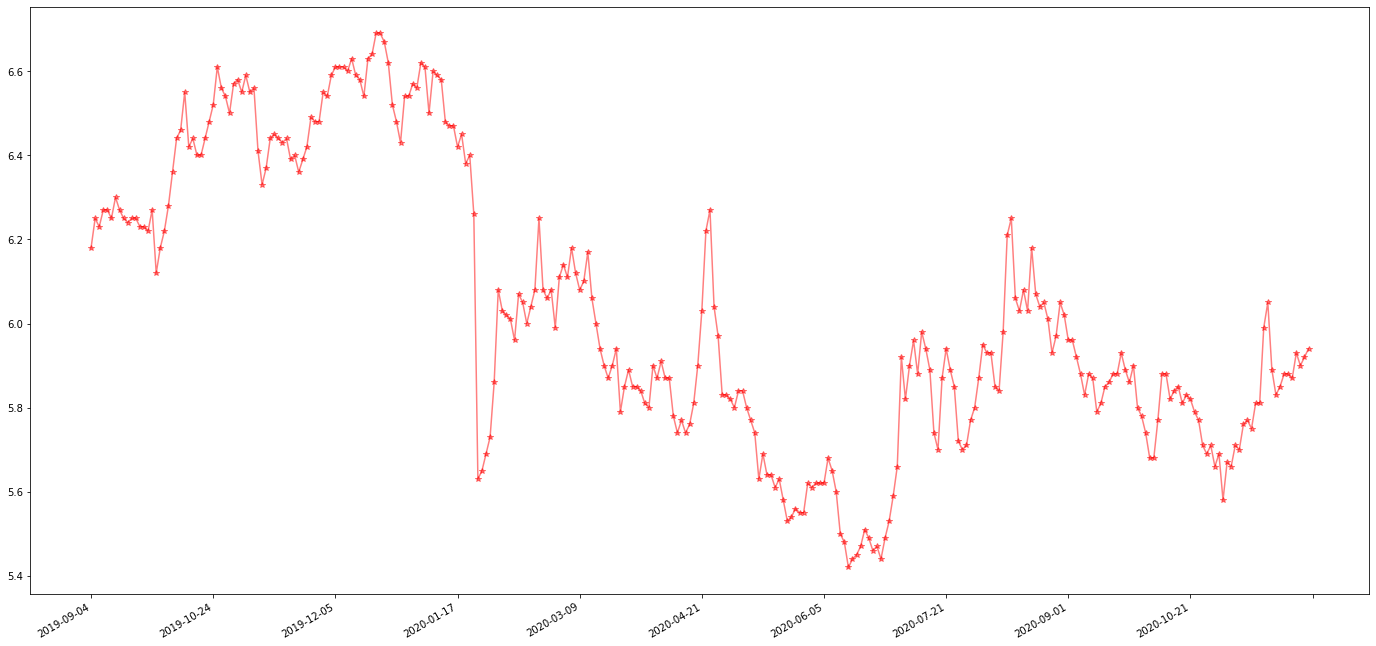

In [232]:
#绘制收盘价时间序列
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
fig=plt.figure(figsize=(24,12))#调整画图空间的大小
plt.plot(df['date'],df['close'],linestyle='-',marker='*',c='r',alpha=0.5)#作图
ax=plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
fig.autofmt_xdate()#防止x轴上的数据重叠，自动调整。

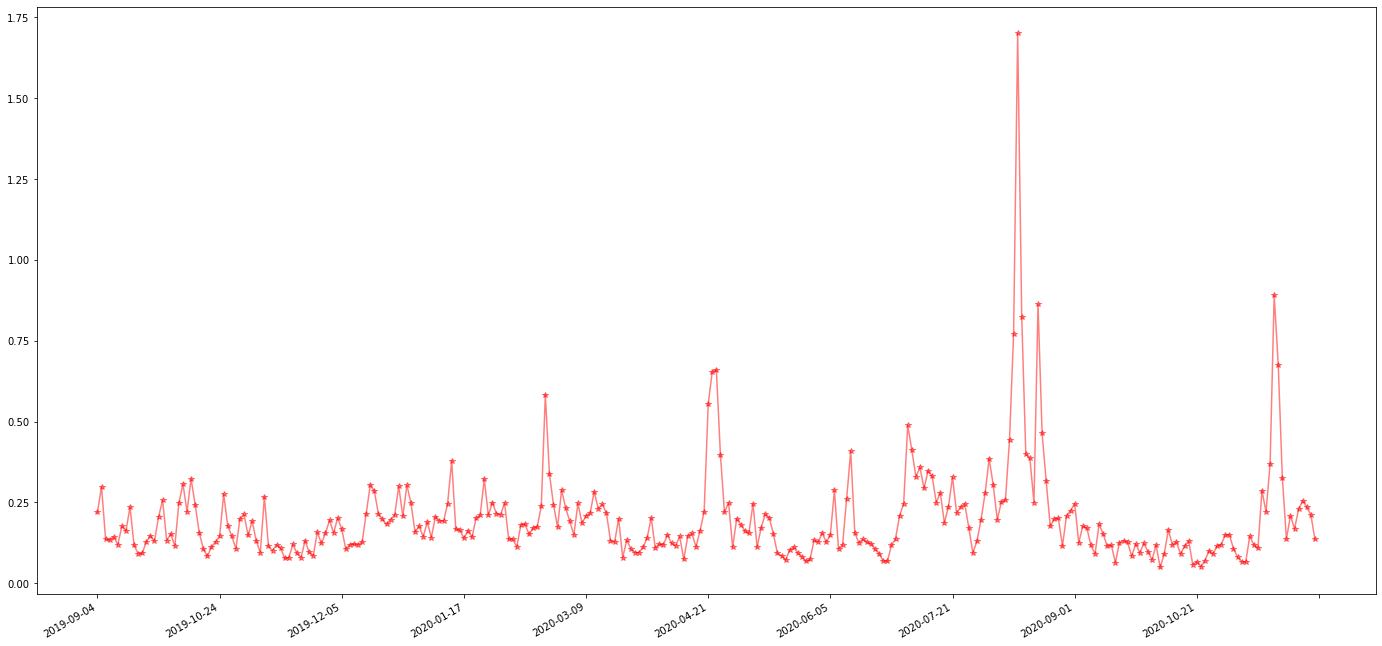

In [233]:
#绘制成交量时间序列
fig=plt.figure(figsize=(24,12))#调整画图空间的大小
plt.plot(df['date'],df['vol'],linestyle='-',marker='*',c='r',alpha=0.5)#作图
ax=plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
fig.autofmt_xdate()#防止x轴上的数据重叠，自动调整。

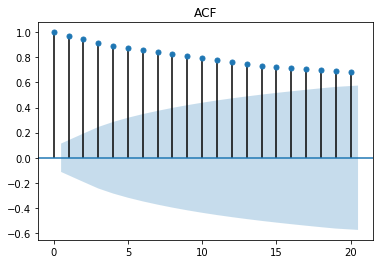

In [235]:
import warnings
import pandas as pd
import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings("ignore")
#绘制acf图
acf = plot_acf(df['close'], lags=20)
plt.title("ACF")
acf.show()

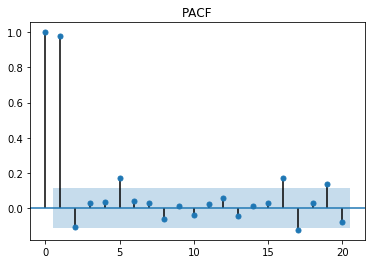

In [295]:
#绘制pacf图
pacf = plot_pacf(df['close'], lags=20)
plt.title("PACF")
pacf.show()

In [237]:
#尝试将数据一阶差分
stock_diff = df['close'].diff()
diff = stock_diff.dropna()
print(diff.head())

1    0.07
2   -0.02
3    0.04
4    0.00
5   -0.02
Name: close, dtype: float64


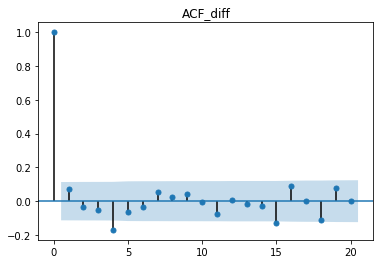

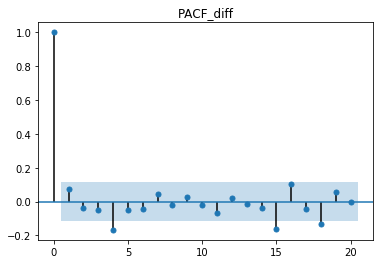

In [238]:
#可见差分后的数据类似白噪声
acf_diff = plot_acf(diff, lags=20)
plt.title("ACF_diff")
acf_diff.show()

pacf_diff = plot_pacf(diff, lags=20)
plt.title("PACF_diff")
pacf_diff.show()

In [239]:
#从acf和pacf可看出自相关函数拖尾，偏自相关函数截尾，假设模型为ar(1)
#从输出表可看出ar(1)模型的常数项和系数p值接近0，均显著
model = ARIMA(df['close'], order=(1, 0, 0))
# 拟合模型
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                  300
Model:                     ARMA(1, 0)   Log Likelihood                 348.784
Method:                       css-mle   S.D. of innovations              0.075
Date:                Wed, 02 Dec 2020   AIC                           -691.567
Time:                        10:36:58   BIC                           -680.456
Sample:                             0   HQIC                          -687.120
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0367      0.137     43.974      0.000       5.768       6.306
ar.L1.close     0.9714      0.012     77.894      0.000       0.947       0.996
                                    Roots       

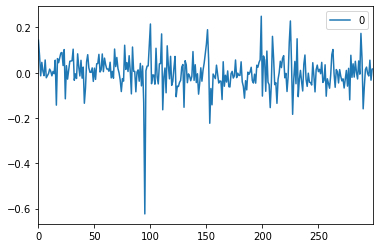

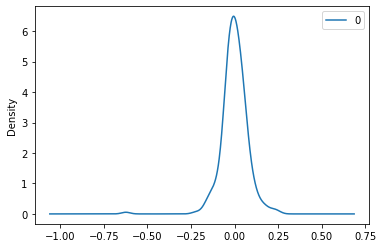

                0
count  300.000000
mean    -0.000464
std      0.075848
min     -0.623614
25%     -0.037611
50%     -0.000473
75%      0.040097
max      0.249228


In [297]:
#绘制白噪声
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [241]:
#p值都大于0.05，即可认为该ar(1)模型的残差序列为白噪声序列
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags = [6, 12],boxpierce=True)

(array([10.87320581, 14.81313479]),
 array([0.0923751 , 0.25181504]),
 array([10.68150657, 14.47825508]),
 array([0.09873289, 0.27121537]))

In [288]:
#预测
pred_vals = arima_result.predict(start=str('2019-09-04'), end=str('2020-12-01'), dynamic=False)
pred_vals.iloc[0] = 6
print(pred_vals)

date
2019-09-04    6.000000
2019-09-05    6.580244
2019-09-06    6.620088
2019-09-09    6.570283
2019-09-10    6.600166
                ...   
2020-11-25    5.265390
2020-11-26    5.275351
2020-11-27    5.464610
2020-11-30    5.374961
2020-12-01    5.355039
Length: 300, dtype: float64


In [291]:
df_exp = df[['date', 'close']]
df_exp.set_index('date', inplace=True)
df_exp

,close
date,
2019-09-04,6.18
2019-09-05,6.25
2019-09-06,6.23
2019-09-09,6.27
2019-09-10,6.27
...,...
2020-11-25,5.87
2020-11-26,5.93
2020-11-27,5.90


In [292]:
stock_forecast = pd.concat([df_exp, pred_vals], axis=1, keys=['original', 'predicted'])
stock_forecast
stock_forecast.iloc[:,1]

date
2019-09-04    6.000000
2019-09-05    6.580244
2019-09-06    6.620088
2019-09-09    6.570283
2019-09-10    6.600166
                ...   
2020-11-25    5.265390
2020-11-26    5.275351
2020-11-27    5.464610
2020-11-30    5.374961
2020-12-01    5.355039
Name: (predicted, 0), Length: 300, dtype: float64

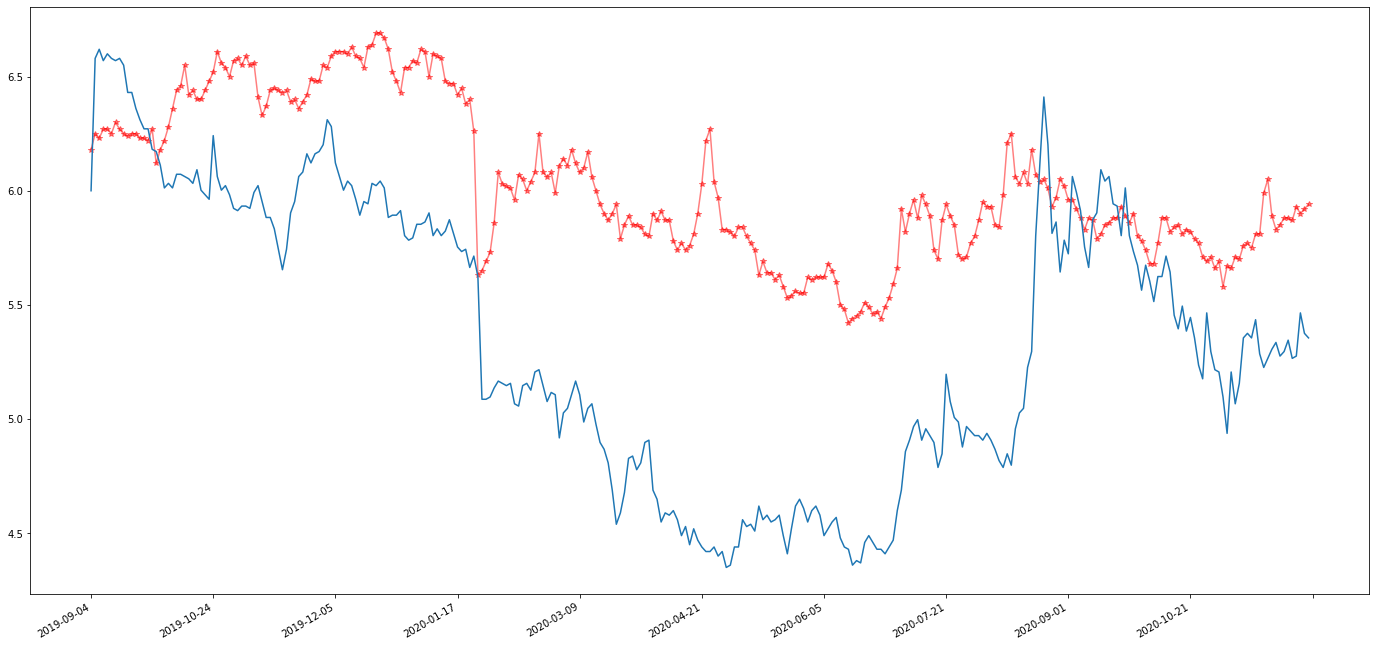

In [294]:
#对比真实值与预测值，具有偏差，说明ar(1)模型预测准确性较低，可尝试其他模型
fig=plt.figure(figsize=(24,12))
plt.plot(stock_forecast.iloc[:,0],linestyle='-',marker='*',c='r',alpha=0.5)
plt.plot(stock_forecast.iloc[:,1])
ax=plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
fig.autofmt_xdate()

In [305]:
#如下进行ARCH效应检验，p值明显的小于0.05，所以可以拒绝上证指数收益率的平方是白噪声，即原序列存在ARCH效应
from statsmodels.tsa import stattools
LjungBox=stattools.q_stat(stattools.acf(residuals**2)[0:299],len(residuals))
LjungBox[1][-1]

3.0080252376439096e-43

In [308]:
from arch import arch_model
am = arch_model(residuals)
model=am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -363.2051608533276
Iteration:      2,   Func. Count:     17,   Neg. LLF: -363.2400199656726
Iteration:      3,   Func. Count:     24,   Neg. LLF: -366.6721216773782
Iteration:      4,   Func. Count:     32,   Neg. LLF: -367.7355470531859
Iteration:      5,   Func. Count:     39,   Neg. LLF: -370.63187889526654
Iteration:      6,   Func. Count:     46,   Neg. LLF: -371.5737288377911
Iteration:      7,   Func. Count:     53,   Neg. LLF: -372.6003481894254
Iteration:      8,   Func. Count:     60,   Neg. LLF: -373.0798549202308
Iteration:      9,   Func. Count:     67,   Neg. LLF: -373.2593870567287
Iteration:     10,   Func. Count:     74,   Neg. LLF: -373.32185200978904
Iteration:     11,   Func. Count:     80,   Neg. LLF: -373.32944763206183
Iteration:     12,   Func. Count:     86,   Neg. LLF: -373.32990724600984
Iteration:     13,   Func. Count:     92,   Neg. LLF: -373.3299093210905
Optimization terminated successfully.    (Exit 

In [309]:
print(model.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      0   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                373.330
Distribution:                  Normal   AIC:                          -738.660
Method:            Maximum Likelihood   BIC:                          -723.845
                                        No. Observations:                  300
Date:                Wed, Dec 02 2020   Df Residuals:                      296
Time:                        11:44:11   Df Model:                            4
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.0893e-03  3.577e-03     -0.305      0.

In [ ]:
#如果需要每天定时爬虫，则需把前述主体定义为一个函数，设定为每天下午3点1分执行
#主函数
def func():
    url_em_sh = 'http://guba.eastmoney.com/remenba.aspx?type=1&tab=1'
    url_em_sz = 'http://guba.eastmoney.com/remenba.aspx?type=1&tab=2'
    url_tx_sh = 'http://gu.qq.com/sh'
    url_tx_sz = 'http://gu.qq.com/sz'
    path = 'C://Users//Aaron Tse//Desktop//stock.txt'
    html_sh = gethtmltext(url_em_sh)
    html_sz = gethtmltext(url_em_sz)
    stocklist_sh = getstocklist_sh(html_sh)
    stocklist_sz = getstocklist_sz(html_sz)
    stockdict = {}
    for code in stocklist_sh:
        try:
            stockcode = get_stock_price(code)[0]
            stockdata = get_stock_price(code)[1]
            stockdict.update({stockcode:stockdata})
        except:
            print(code + 'wrong')
    for code in stocklist_sz:
        try:
            stockcode = get_stock_price(code)[0]
            stockdata = get_stock_price(code)[1]
            stockdict.update({stockcode:stockdata})
        except:
            print(code + 'wrong')
if __name__ == '__main__':
    sched = BlockingScheduler()
    sched.add_job(func, 'cron', hour = 15, minute = 1)
    sched.start()